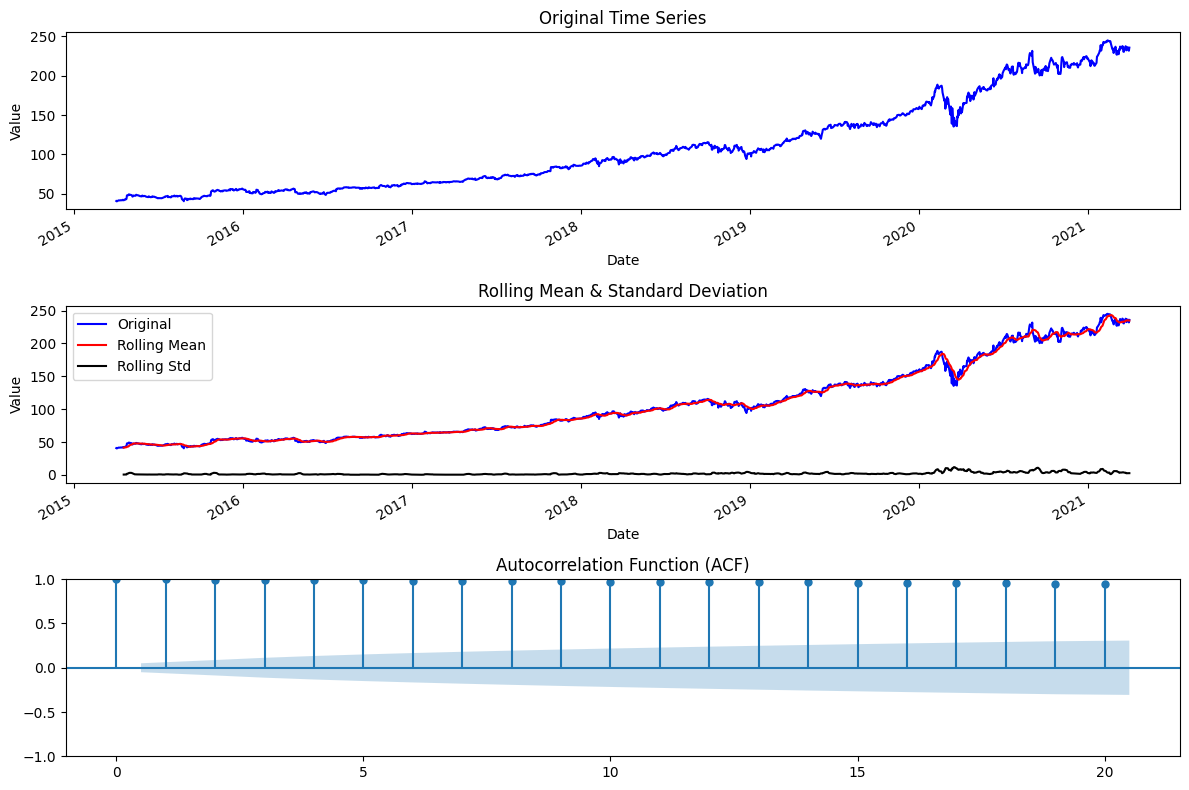

Stationarity: False
P-value: 0.9982158366942122
Status: Time Series is Non-Stationary


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller


def check_stationarity(timeseries):


    result = adfuller(timeseries)
    p_value = result[1]
    critical_values = result[4]

    if p_value < 0.05:
        stationary = True
        status = "Time Series is Stationary"
    else:
        stationary = False
        status = "Time Series is Non-Stationary"

    fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(12, 8))

    timeseries.plot(ax=ax1, title="Original Time Series", color='blue')
    ax1.set_ylabel("Value")

    roll_mean = timeseries.rolling(window=12).mean()
    roll_std = timeseries.rolling(window=12).std()
    timeseries.plot(ax=ax2, label='Original', color='blue')
    roll_mean.plot(ax=ax2, label='Rolling Mean', color='red')
    roll_std.plot(ax=ax2, label='Rolling Std', color='black')
    ax2.set_ylabel("Value")
    ax2.legend(loc='best')
    ax2.set_title("Rolling Mean & Standard Deviation")

    try:
        from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
        plot_acf(timeseries, ax=ax3, lags=20)
        ax3.set_title("Autocorrelation Function (ACF)")
        plt.tight_layout()
        plt.show()
    except ImportError as e:
        print(f"Warning: statsmodels not installed. ACF/PACF plots not generated. Install with: pip install statsmodels")

    return stationary, p_value, status, fig


data = pd.read_csv('/content/Microsoft_Stock.csv', parse_dates=['Date'], index_col='Date')

timeseries = data['Close']

is_stationary, p_value, status, fig = check_stationarity(timeseries)

print(f"Stationarity: {is_stationary}")
print(f"P-value: {p_value}")
print(f"Status: {status}")
plt.show()
